In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
# Get unit4 data as df

In [3]:
data = pd.read_csv (r'unit4.csv') # import file

In [4]:
data

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,...,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,NaN,,988,...,,14,6,5,12,9702,L1G,1,NaN,25.000000
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,...,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,...,,33,14,7,17,9702,L3E,7,3.0,8.285714


## split the data into numericals and categoricals for EDA

In [7]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [6]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

## data quality check

In [9]:
data.duplicated().sum() # count duplicates

1

In [12]:
data[data.duplicated(keep=False)] # see duplicates

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
36109,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0
49464,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0


In [13]:
data = data.drop_duplicates()# drop duplicate and replaces the data frame

## after deleting a row, reset index

In [14]:
data.reset_index(drop=True, inplace=True)

# see all columns, EDA on numerical

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [18]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

In [19]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


### create a nulls data frame which summarises % of nulls per column

In [22]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num))

In [23]:
nulls.reset_index(inplace=True)

In [24]:
nulls.columns=['column_name', 'percentage_nulls']
nulls.sort_values(by='percentage_nulls', ascending=False)
# this is your data quality snapshot

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


# fill in nulls
- with a fixed value
- with interpolation

In [28]:
median_d=d_num['INCOME']. fillna(d_num['INCOME'].median())

In [29]:
median_d.head(10)

0    4.0
1    6.0
2    3.0
3    1.0
4    3.0
5    4.0
6    4.0
7    2.0
8    3.0
9    4.0
Name: INCOME, dtype: float64

<AxesSubplot:>

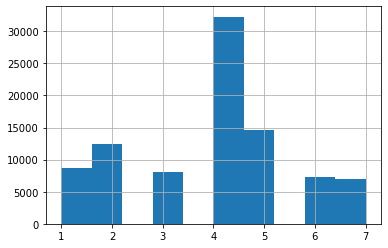

In [32]:
median_d.hist()

In [30]:
zeros_d=d_num['INCOME']. fillna(0)

In [31]:
zeros_d

0        0.0
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
90563    6.0
90564    0.0
90565    7.0
90566    0.0
90567    5.0
Name: INCOME, Length: 90568, dtype: float64

<AxesSubplot:>

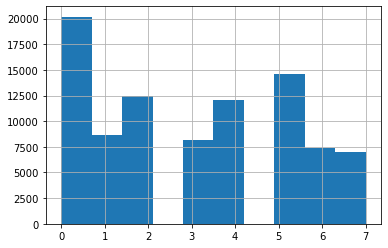

In [33]:
zeros_d.hist()

## after picking your method, apply to your dataframe

In [36]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [37]:
d_num['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

<AxesSubplot:xlabel='TIMELAG', ylabel='AVGGIFT'>

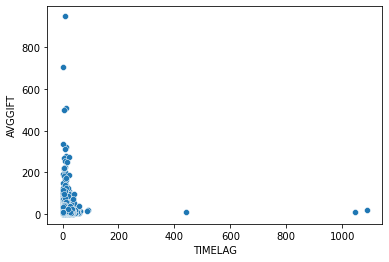

In [38]:
sns.scatterplot(data=d_num, x="TIMELAG", y="AVGGIFT")

In [ ]:
# removing outliers then scatter plot again
- IQR
- upper limit
- exclude anything over upper limit
OR FILTER BY A FIXED LIMIT

In [ ]:
# pd.cut or pd.qcut
# OR create a function to bucket values